___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

## Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

## Improt Libraries

In [110]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored

sns.set_style("whitegrid")
pd.options.display.float_format = '{:,.2f}'.format

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.warn("this will not show")

# Figure & Display options
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)


## Indest Data

In [111]:
df0 = pd.read_csv("Churn_Modelling.csv", index_col="RowNumber")
df = df0.copy()

In [112]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,"101,348.88",1
2,15647311,Hill,608,Spain,Female,41,1,"83,807.86",1,0,1,"112,542.58",0
3,15619304,Onio,502,France,Female,42,8,"159,660.80",3,1,0,"113,931.57",1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,"93,826.63",0
5,15737888,Mitchell,850,Spain,Female,43,2,"125,510.82",1,1,1,"79,084.10",0


In [113]:
df.shape

(10000, 13)

## User-defined Functions before EDA

In [114]:
def df_general_view(df):
    print(colored("Shape:", attrs=['bold']), df.shape,'\n',
          f"There is ", df.shape[0], " observation and ", df.shape[1], " columns in the dataset.", '\n',
          colored('-'*79, 'red', attrs=['bold']),
          colored("\nInfo:\n", attrs=['bold']), sep='')
    print(df.info(), '\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Number of Uniques:\n", attrs=['bold']), df.nunique(),'\n',
          colored('-'*79, 'red', attrs=['bold']), sep='')
    if missing_values(df).empty:
        print(colored("Missing Values: ", attrs=['bold']), "There is no missing value in the given dataframe",'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
    else:
        print(colored("Missing Values:\n", attrs=['bold']), missing_values(df),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
    
def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    missing_values=missing_values[missing_values['Missing_Number']>0]
    return missing_values



## Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [115]:
df_general_view(df)

Shape:(10000, 13)
There is 10000 observation and 13 columns in the dataset.
-------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3

In [116]:
df.sample(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
7286,15725028,Chialuka,679,France,Male,29,3,0.00,2,1,1,"63,687.06",0
2621,15685300,Meng,603,France,Male,35,6,"128,993.76",2,1,0,"130,483.56",0
4219,15782418,Ku,589,Germany,Female,19,9,"83,495.11",1,1,1,"143,022.31",1
1453,15774882,Mazzanti,687,France,Female,35,3,"99,587.43",1,1,1,"1,713.10",1
3170,15688172,Tai,677,Spain,Male,40,5,0.00,2,1,0,"88,947.56",0
2011,15612050,Castiglione,556,Spain,Female,48,8,"168,522.37",1,1,1,"151,310.16",0
8763,15765173,Lin,350,France,Female,60,3,0.00,1,0,0,"113,796.15",1
1510,15638149,Rowley,528,France,Male,37,6,"103,772.45",1,1,0,"197,111.99",0
1333,15796721,Nnamutaezinwa,778,France,Male,38,3,"145,018.49",2,1,1,"126,702.41",0


In [117]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

The columns of "CustomerId" and "Surname" are nothing to do with the analysis here. Let us drop these three columns.

In [118]:
df.drop(["CustomerId", "Surname"], axis=1, inplace=True)

In [119]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,"101,348.88",1
2,608,Spain,Female,41,1,"83,807.86",1,0,1,"112,542.58",0
3,502,France,Female,42,8,"159,660.80",3,1,0,"113,931.57",1
4,699,France,Female,39,1,0.00,2,0,0,"93,826.63",0
5,850,Spain,Female,43,2,"125,510.82",1,1,1,"79,084.10",0


In order to prevent any problems with interger values in calculations, let us convert them into float numbers.

In [120]:
df= df.apply(lambda x: x.astype(float) if x.dtype=="int64" else x)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  float64
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  float64
 4   Tenure           10000 non-null  float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  float64
 7   HasCrCard        10000 non-null  float64
 8   IsActiveMember   10000 non-null  float64
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  float64
dtypes: float64(9), object(2)
memory usage: 937.5+ KB


In [121]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,"10,000.00",650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,"10,000.00",38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,"10,000.00",5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,"10,000.00","76,485.89","62,397.41",0.00,0.00,"97,198.54","127,644.24","250,898.09"
NumOfProducts,"10,000.00",1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,"10,000.00",0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,"10,000.00",0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,"10,000.00","100,090.24","57,510.49",11.58,"51,002.11","100,193.91","149,388.25","199,992.48"
Exited,"10,000.00",0.20,0.40,0.00,0.00,0.00,0.00,1.00


In [122]:
df.describe(include=object).T

,count,unique,top,freq
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [123]:
df.duplicated().value_counts()

False    10000
dtype: int64

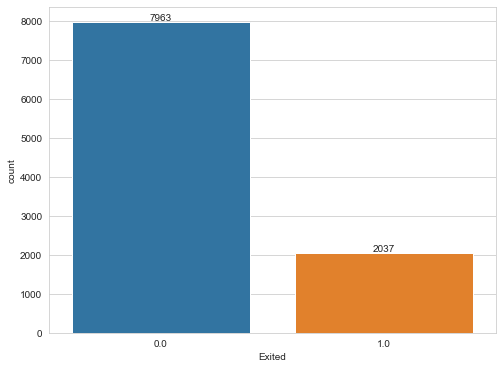

In [124]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=df['Exited']);
abs_values = df['Exited'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values);

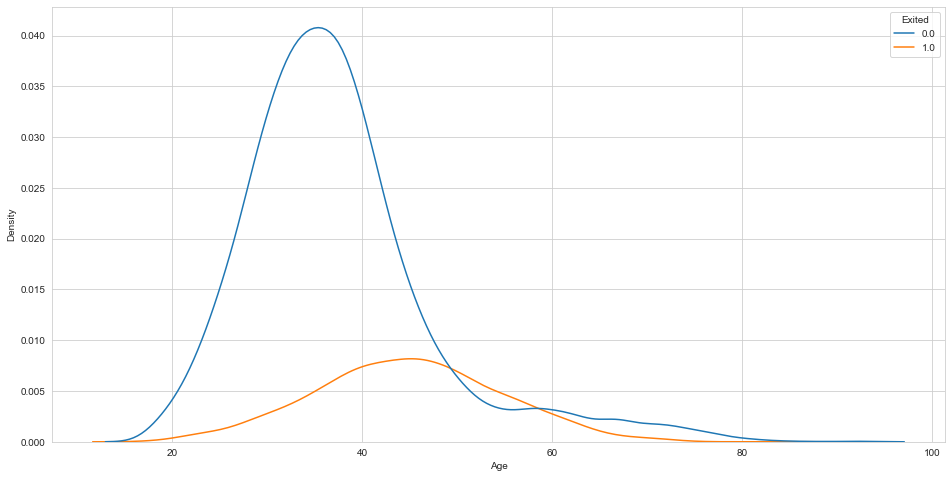

In [125]:
plt.figure(figsize=(16, 8))
sns.kdeplot(data=df,x='Age',hue='Exited');

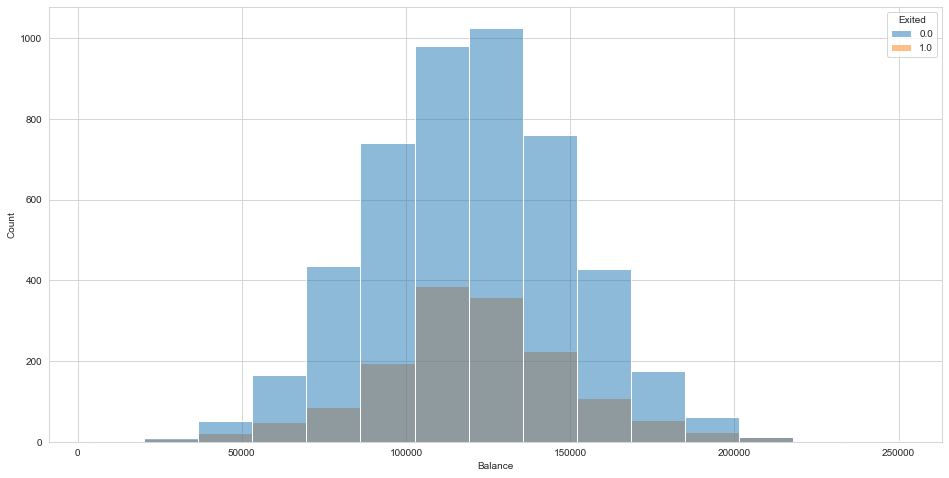

In [126]:
plt.figure(figsize=(16, 8))
sns.histplot(data=df[df['Balance']>0],x='Balance',bins=15,hue='Exited');

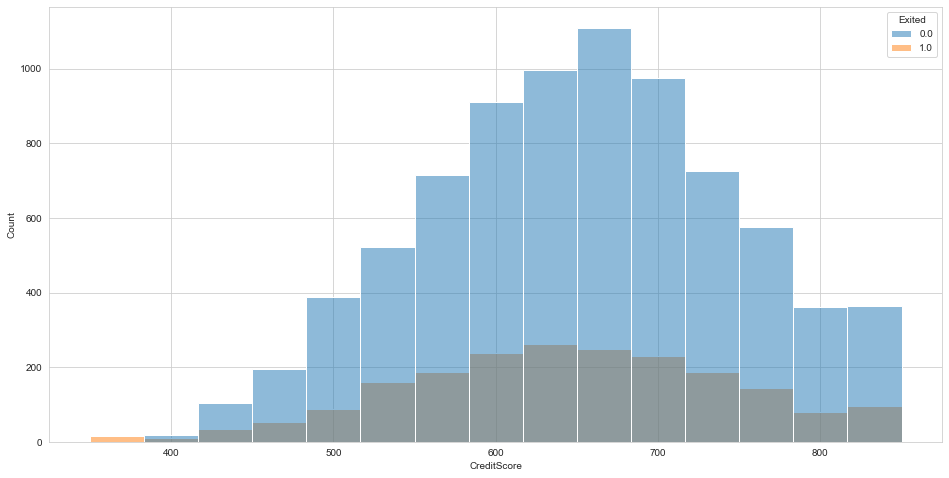

In [127]:
plt.figure(figsize=(16, 8))
sns.histplot(data=df,x='CreditScore',bins=15,hue='Exited');

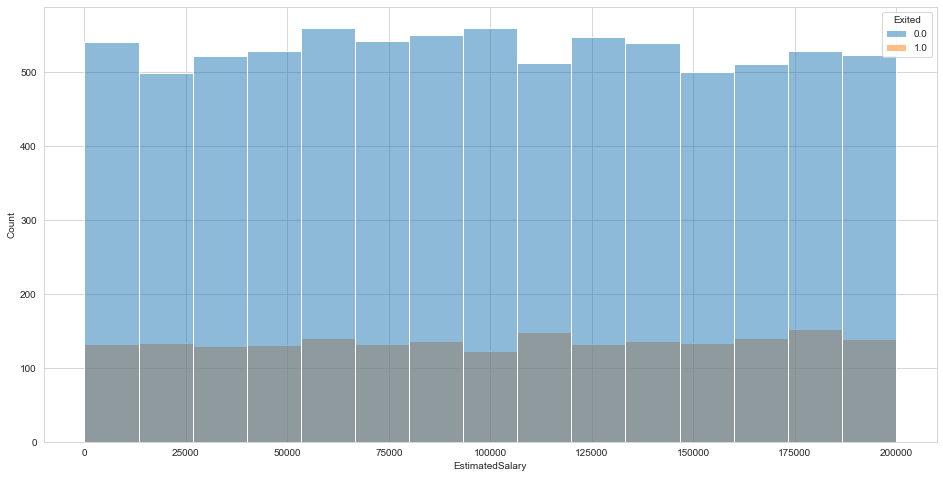

In [128]:
plt.figure(figsize=(16, 8))
sns.histplot(data=df,x='EstimatedSalary',bins=15, hue='Exited');

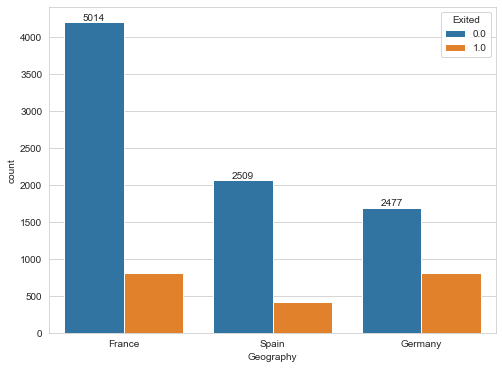

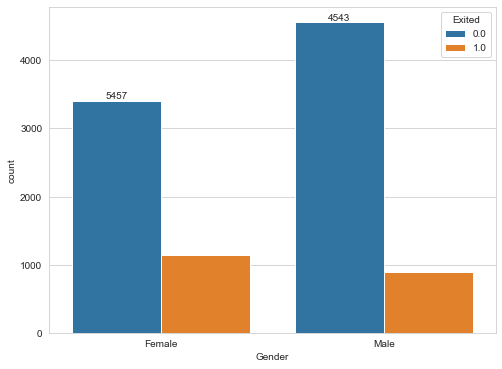

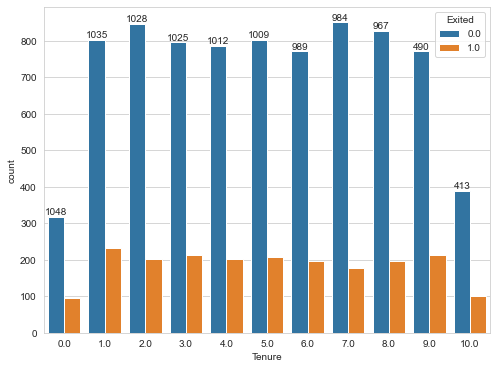

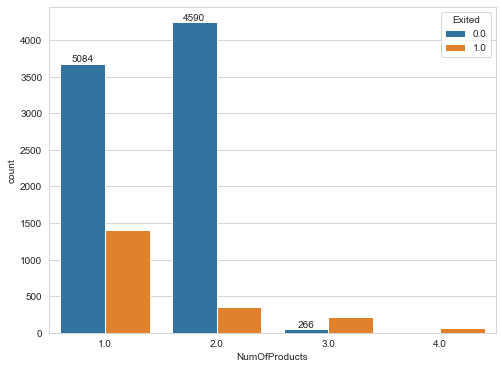

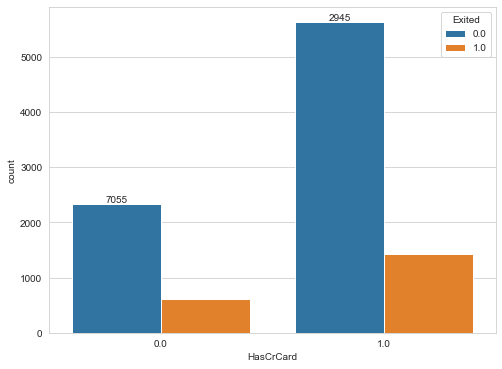

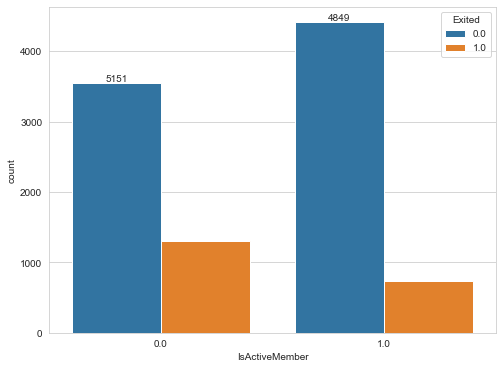

In [129]:
for col in ['Geography', 'Gender', 'Tenure', 
            'NumOfProducts', 'HasCrCard', 'IsActiveMember']:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(data=df,x=col, hue='Exited');
    abs_values = df[col].value_counts(ascending=False).values
    ax.bar_label(container=ax.containers[0], labels=abs_values);

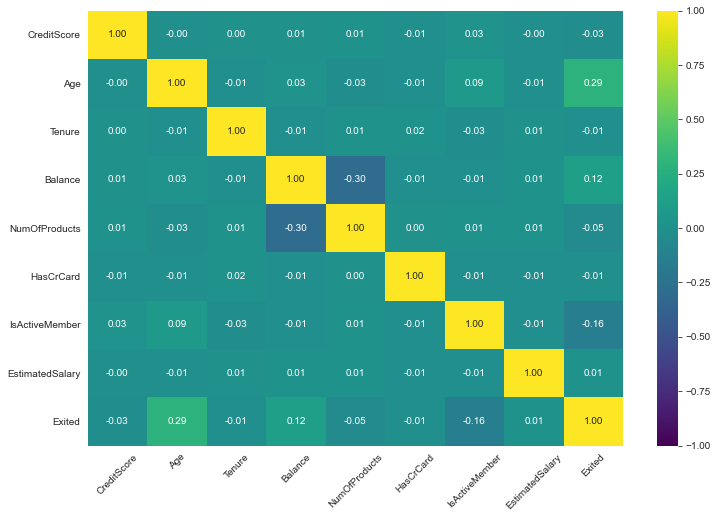

In [130]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt= '.2f', vmin=-1, vmax=1,cmap="viridis")
plt.xticks(rotation=45);

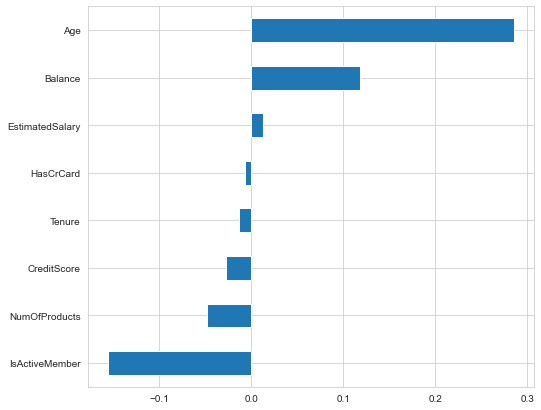

In [131]:
plt.figure(figsize = (8, 7))
df.corr()['Exited'].sort_values().drop("Exited").plot(kind = "barh");

In [132]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
RowNumber,,,,,,,,,,,,
1,619.00,42.00,2.00,0.00,1.00,1.00,1.00,"101,348.88",1.00,0,0,0
2,608.00,41.00,1.00,"83,807.86",1.00,0.00,1.00,"112,542.58",0.00,0,1,0
3,502.00,42.00,8.00,"159,660.80",3.00,1.00,0.00,"113,931.57",1.00,0,0,0
4,699.00,39.00,1.00,0.00,2.00,0.00,0.00,"93,826.63",0.00,0,0,0
5,850.00,43.00,2.00,"125,510.82",1.00,1.00,1.00,"79,084.10",0.00,0,1,0


## Preprocessing of Data
- Train | Test Split, Scalling

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [134]:
seed=42

In [135]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = seed)

In [137]:
scaler = MinMaxScaler()

In [138]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling & Model Performance

### Import related libraries

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
X_train.shape

(9000, 11)

### Creating Model

### without class_weigth

In [32]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = Adam(lr=0.001), loss = "binary_crossentropy", metrics = ["Recall"])

In [33]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 300, verbose=1)

Epoch 1/300
64/64 [==============================] - 2s 8ms/step - loss: 0.6147 - recall: 0.1501 - val_loss: 0.5111 - val_recall: 0.0000e+00
Epoch 2/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5009 - recall: 0.0000e+00 - val_loss: 0.4853 - val_recall: 0.0000e+00
Epoch 3/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4839 - recall: 0.0000e+00 - val_loss: 0.4669 - val_recall: 0.0000e+00
Epoch 4/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4696 - recall: 0.0030 - val_loss: 0.4506 - val_recall: 0.0221
Epoch 5/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4587 - recall: 0.0769 - val_loss: 0.4368 - val_recall: 0.1271
Epoch 6/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4469 - recall: 0.1041 - val_loss: 0.4245 - val_recall: 0.1381
Epoch 7/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4368 - recall: 0.1616 - val_loss: 0.4088 - val_recall: 0.2265
Epoch 8/300
64/64 [==

64/64 [==============================] - 0s 2ms/step - loss: 0.3353 - recall: 0.4625 - val_loss: 0.2937 - val_recall: 0.5470
Epoch 61/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3355 - recall: 0.4522 - val_loss: 0.2960 - val_recall: 0.5746
Epoch 62/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3353 - recall: 0.4637 - val_loss: 0.2941 - val_recall: 0.5580
Epoch 63/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3348 - recall: 0.4594 - val_loss: 0.2929 - val_recall: 0.5856
Epoch 64/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3363 - recall: 0.4594 - val_loss: 0.2998 - val_recall: 0.6243
Epoch 65/300
64/64 [==============================] - 0s 4ms/step - loss: 0.3341 - recall: 0.4504 - val_loss: 0.2942 - val_recall: 0.5525
Epoch 66/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3341 - recall: 0.4728 - val_loss: 0.2992 - val_recall: 0.5967
Epoch 67/300
64/64 [===========================

64/64 [==============================] - 0s 3ms/step - loss: 0.3245 - recall: 0.4746 - val_loss: 0.2946 - val_recall: 0.5525
Epoch 120/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3256 - recall: 0.4728 - val_loss: 0.2938 - val_recall: 0.5580
Epoch 121/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3254 - recall: 0.4746 - val_loss: 0.2936 - val_recall: 0.5635
Epoch 122/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3276 - recall: 0.4879 - val_loss: 0.2948 - val_recall: 0.4807
Epoch 123/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3258 - recall: 0.4837 - val_loss: 0.2985 - val_recall: 0.5028
Epoch 124/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3243 - recall: 0.4849 - val_loss: 0.2963 - val_recall: 0.4917
Epoch 125/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3257 - recall: 0.4818 - val_loss: 0.2940 - val_recall: 0.5359
Epoch 126/300
64/64 [====================

64/64 [==============================] - 0s 3ms/step - loss: 0.3197 - recall: 0.4970 - val_loss: 0.3009 - val_recall: 0.6022
Epoch 179/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3176 - recall: 0.4952 - val_loss: 0.2978 - val_recall: 0.4972
Epoch 180/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3170 - recall: 0.5006 - val_loss: 0.2991 - val_recall: 0.5691
Epoch 181/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3171 - recall: 0.5000 - val_loss: 0.3022 - val_recall: 0.5801
Epoch 182/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3185 - recall: 0.5006 - val_loss: 0.2966 - val_recall: 0.4917
Epoch 183/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3169 - recall: 0.5048 - val_loss: 0.2985 - val_recall: 0.5359
Epoch 184/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3162 - recall: 0.5030 - val_loss: 0.2996 - val_recall: 0.5414
Epoch 185/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3122 - recall: 0.5151 - val_loss: 0.2992 - val_recall: 0.4917
Epoch 238/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3141 - recall: 0.5042 - val_loss: 0.2997 - val_recall: 0.5746
Epoch 239/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3127 - recall: 0.5157 - val_loss: 0.3031 - val_recall: 0.5414
Epoch 240/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3130 - recall: 0.5079 - val_loss: 0.3001 - val_recall: 0.5193
Epoch 241/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3118 - recall: 0.5139 - val_loss: 0.3010 - val_recall: 0.5083
Epoch 242/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3134 - recall: 0.5042 - val_loss: 0.3053 - val_recall: 0.4696
Epoch 243/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3132 - recall: 0.5079 - val_loss: 0.3069 - val_recall: 0.5912
Epoch 244/300
64/64 [====================

64/64 [==============================] - 0s 3ms/step - loss: 0.3088 - recall: 0.5133 - val_loss: 0.3049 - val_recall: 0.5525
Epoch 297/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3098 - recall: 0.5121 - val_loss: 0.3026 - val_recall: 0.5580
Epoch 298/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3081 - recall: 0.5212 - val_loss: 0.3017 - val_recall: 0.5249
Epoch 299/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3079 - recall: 0.5200 - val_loss: 0.3001 - val_recall: 0.5138
Epoch 300/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3086 - recall: 0.5163 - val_loss: 0.3002 - val_recall: 0.5359


In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


#### Evaluate

In [35]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.61,0.15,0.51,0.00
1,0.50,0.00,0.49,0.00
2,0.48,0.00,0.47,0.00
3,0.47,0.00,0.45,0.02
4,0.46,0.08,0.44,0.13


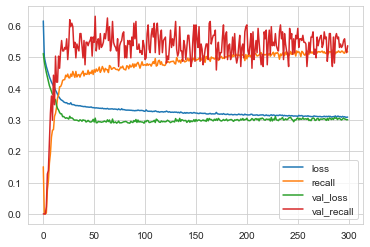

In [36]:
loss_df.plot();

In [37]:
model.evaluate(X_test, y_test, verbose=0)

[0.348883718252182, 0.46078431606292725]

In [38]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.348883718252182
accuracy :  0.46078431606292725


In [39]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[761  35]
 [110  94]]
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91       796
         1.0       0.73      0.46      0.56       204

    accuracy                           0.85      1000
   macro avg       0.80      0.71      0.74      1000
weighted avg       0.84      0.85      0.84      1000



### ROC (Receiver Operating Curve) and AUC (Area Under Curve)

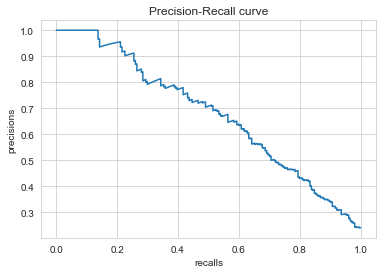

In [40]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [41]:
average_precision_score(y_test,y_pred_proba)

0.6786292577863308

### with class_weigths

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [42]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = Adam(lr=0.001), loss = "binary_crossentropy", metrics = ["Recall"])

In [43]:
from sklearn.utils import class_weight

In [44]:
class_weights=class_weight.compute_class_weight('balanced',classes=np.unique(y_train),y=y_train)

In [45]:
class_weights={0:class_weights[0],1:class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [46]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 300, verbose=1,class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 1s 7ms/step - loss: 0.6834 - recall: 0.7778 - val_loss: 0.6916 - val_recall: 0.7680
Epoch 2/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6503 - recall: 0.6883 - val_loss: 0.6544 - val_recall: 0.7735
Epoch 3/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6230 - recall: 0.6665 - val_loss: 0.5958 - val_recall: 0.7182
Epoch 4/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6041 - recall: 0.6943 - val_loss: 0.5693 - val_recall: 0.7072
Epoch 5/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5892 - recall: 0.7046 - val_loss: 0.5499 - val_recall: 0.6796
Epoch 6/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5744 - recall: 0.7028 - val_loss: 0.4951 - val_recall: 0.6464
Epoch 7/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5607 - recall: 0.7173 - val_loss: 0.5341 - val_recall: 0.7790
Epoch 8/300
64/64 [======================

64/64 [==============================] - 0s 3ms/step - loss: 0.4572 - recall: 0.7494 - val_loss: 0.4400 - val_recall: 0.8343
Epoch 61/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4566 - recall: 0.7615 - val_loss: 0.4399 - val_recall: 0.8287
Epoch 62/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4561 - recall: 0.7603 - val_loss: 0.4399 - val_recall: 0.8287
Epoch 63/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4556 - recall: 0.7609 - val_loss: 0.4454 - val_recall: 0.8343
Epoch 64/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4581 - recall: 0.7573 - val_loss: 0.4721 - val_recall: 0.8508
Epoch 65/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4554 - recall: 0.7621 - val_loss: 0.4051 - val_recall: 0.8122
Epoch 66/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4565 - recall: 0.7688 - val_loss: 0.4438 - val_recall: 0.8287
Epoch 67/300
64/64 [===========================

64/64 [==============================] - 0s 2ms/step - loss: 0.4400 - recall: 0.7730 - val_loss: 0.4201 - val_recall: 0.8011
Epoch 120/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4397 - recall: 0.7778 - val_loss: 0.4072 - val_recall: 0.8011
Epoch 121/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4382 - recall: 0.7718 - val_loss: 0.4506 - val_recall: 0.8343
Epoch 122/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4446 - recall: 0.7785 - val_loss: 0.3782 - val_recall: 0.7790
Epoch 123/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4408 - recall: 0.7657 - val_loss: 0.3920 - val_recall: 0.7901
Epoch 124/300
64/64 [==============================] - 0s 4ms/step - loss: 0.4387 - recall: 0.7833 - val_loss: 0.4059 - val_recall: 0.8011
Epoch 125/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4412 - recall: 0.7736 - val_loss: 0.3986 - val_recall: 0.7845
Epoch 126/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.4298 - recall: 0.7881 - val_loss: 0.4497 - val_recall: 0.8343
Epoch 179/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4291 - recall: 0.7766 - val_loss: 0.4133 - val_recall: 0.8122
Epoch 180/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4273 - recall: 0.7803 - val_loss: 0.4293 - val_recall: 0.8177
Epoch 181/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4288 - recall: 0.7833 - val_loss: 0.4313 - val_recall: 0.8177
Epoch 182/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4292 - recall: 0.7815 - val_loss: 0.3881 - val_recall: 0.8066
Epoch 183/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4268 - recall: 0.7851 - val_loss: 0.4051 - val_recall: 0.8122
Epoch 184/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4277 - recall: 0.7809 - val_loss: 0.4025 - val_recall: 0.8122
Epoch 185/300
64/64 [====================

64/64 [==============================] - 0s 3ms/step - loss: 0.4198 - recall: 0.7942 - val_loss: 0.3678 - val_recall: 0.7624
Epoch 238/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4239 - recall: 0.7785 - val_loss: 0.4399 - val_recall: 0.8453
Epoch 239/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4199 - recall: 0.7942 - val_loss: 0.4250 - val_recall: 0.8122
Epoch 240/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4216 - recall: 0.7833 - val_loss: 0.3950 - val_recall: 0.8011
Epoch 241/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4188 - recall: 0.7924 - val_loss: 0.3981 - val_recall: 0.8011
Epoch 242/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4220 - recall: 0.7881 - val_loss: 0.3678 - val_recall: 0.7735
Epoch 243/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4210 - recall: 0.7869 - val_loss: 0.4399 - val_recall: 0.8343
Epoch 244/300
64/64 [====================

64/64 [==============================] - 0s 3ms/step - loss: 0.4131 - recall: 0.7893 - val_loss: 0.4402 - val_recall: 0.8453
Epoch 297/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4136 - recall: 0.8033 - val_loss: 0.4326 - val_recall: 0.8287
Epoch 298/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4137 - recall: 0.7936 - val_loss: 0.3843 - val_recall: 0.7735
Epoch 299/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4124 - recall: 0.7942 - val_loss: 0.3649 - val_recall: 0.7514
Epoch 300/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4130 - recall: 0.7918 - val_loss: 0.3960 - val_recall: 0.8011


In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                384       
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 8)                 136       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


#### Evaluate

In [48]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.68,0.78,0.69,0.77
1,0.65,0.69,0.65,0.77
2,0.62,0.67,0.60,0.72
3,0.60,0.69,0.57,0.71
4,0.59,0.70,0.55,0.68


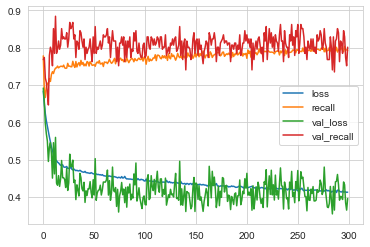

In [49]:
loss_df.plot();

In [50]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[644 152]
 [ 43 161]]
              precision    recall  f1-score   support

         0.0       0.94      0.81      0.87       796
         1.0       0.51      0.79      0.62       204

    accuracy                           0.81      1000
   macro avg       0.73      0.80      0.75      1000
weighted avg       0.85      0.81      0.82      1000



### ROC (Receiver Operating Curve) and AUC (Area Under Curve)

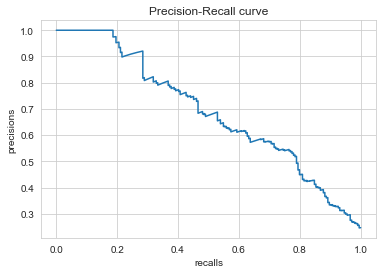

In [51]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [52]:
average_precision_score(y_test,y_pred_proba)

0.6902545102996162

### Rerun Model with Increased Learning Rate

In [53]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = Adam(lr=0.005), loss = "binary_crossentropy", metrics = ["Recall"])

In [54]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 300, verbose=1,class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 2s 8ms/step - loss: 0.6459 - recall: 0.7179 - val_loss: 0.5949 - val_recall: 0.7017
Epoch 2/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5950 - recall: 0.6834 - val_loss: 0.6509 - val_recall: 0.8785
Epoch 3/300
64/64 [==============================] - 0s 4ms/step - loss: 0.5653 - recall: 0.7100 - val_loss: 0.5274 - val_recall: 0.8177
Epoch 4/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5207 - recall: 0.7464 - val_loss: 0.5549 - val_recall: 0.8785
Epoch 5/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5079 - recall: 0.7464 - val_loss: 0.4494 - val_recall: 0.8177
Epoch 6/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4956 - recall: 0.7482 - val_loss: 0.4252 - val_recall: 0.7624
Epoch 7/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4889 - recall: 0.7591 - val_loss: 0.4179 - val_recall: 0.8122
Epoch 8/300
64/64 [======================

64/64 [==============================] - 0s 2ms/step - loss: 0.4216 - recall: 0.7912 - val_loss: 0.4441 - val_recall: 0.8398
Epoch 61/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4226 - recall: 0.7942 - val_loss: 0.4346 - val_recall: 0.7845
Epoch 62/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4190 - recall: 0.7984 - val_loss: 0.4674 - val_recall: 0.8343
Epoch 63/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4175 - recall: 0.8039 - val_loss: 0.4179 - val_recall: 0.8232
Epoch 64/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4238 - recall: 0.7996 - val_loss: 0.4151 - val_recall: 0.8066
Epoch 65/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4167 - recall: 0.7996 - val_loss: 0.3990 - val_recall: 0.7735
Epoch 66/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4146 - recall: 0.8033 - val_loss: 0.4693 - val_recall: 0.8453
Epoch 67/300
64/64 [===========================

64/64 [==============================] - 0s 2ms/step - loss: 0.3963 - recall: 0.8226 - val_loss: 0.4301 - val_recall: 0.7459
Epoch 120/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3907 - recall: 0.8196 - val_loss: 0.4489 - val_recall: 0.7569
Epoch 121/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3868 - recall: 0.8166 - val_loss: 0.4927 - val_recall: 0.7956
Epoch 122/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3976 - recall: 0.8142 - val_loss: 0.4089 - val_recall: 0.7514
Epoch 123/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3941 - recall: 0.8184 - val_loss: 0.4297 - val_recall: 0.7459
Epoch 124/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3867 - recall: 0.8196 - val_loss: 0.4428 - val_recall: 0.7624
Epoch 125/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3928 - recall: 0.8238 - val_loss: 0.4369 - val_recall: 0.7680
Epoch 126/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3671 - recall: 0.8396 - val_loss: 0.4817 - val_recall: 0.7293
Epoch 179/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3716 - recall: 0.8293 - val_loss: 0.4409 - val_recall: 0.6851
Epoch 180/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3678 - recall: 0.8281 - val_loss: 0.4773 - val_recall: 0.7514
Epoch 181/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3701 - recall: 0.8287 - val_loss: 0.4684 - val_recall: 0.7459
Epoch 182/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3694 - recall: 0.8287 - val_loss: 0.4446 - val_recall: 0.7127
Epoch 183/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3664 - recall: 0.8281 - val_loss: 0.4624 - val_recall: 0.7514
Epoch 184/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3678 - recall: 0.8347 - val_loss: 0.4920 - val_recall: 0.7624
Epoch 185/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3522 - recall: 0.8481 - val_loss: 0.4495 - val_recall: 0.6906
Epoch 238/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3534 - recall: 0.8432 - val_loss: 0.5572 - val_recall: 0.7514
Epoch 239/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3505 - recall: 0.8420 - val_loss: 0.4802 - val_recall: 0.7403
Epoch 240/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3456 - recall: 0.8487 - val_loss: 0.4711 - val_recall: 0.7182
Epoch 241/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3446 - recall: 0.8402 - val_loss: 0.5215 - val_recall: 0.7459
Epoch 242/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3486 - recall: 0.8450 - val_loss: 0.4726 - val_recall: 0.7072
Epoch 243/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3467 - recall: 0.8438 - val_loss: 0.5430 - val_recall: 0.7790
Epoch 244/300
64/64 [====================

64/64 [==============================] - 0s 4ms/step - loss: 0.3672 - recall: 0.8402 - val_loss: 0.5233 - val_recall: 0.7459
Epoch 297/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3429 - recall: 0.8547 - val_loss: 0.4991 - val_recall: 0.7624
Epoch 298/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3364 - recall: 0.8602 - val_loss: 0.4929 - val_recall: 0.7348
Epoch 299/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3335 - recall: 0.8559 - val_loss: 0.4897 - val_recall: 0.6961
Epoch 300/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3354 - recall: 0.8577 - val_loss: 0.5120 - val_recall: 0.7459


In [55]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                384       
                                                                 
 dense_9 (Dense)             (None, 16)                528       
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


#### Evaluate

In [56]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.65,0.72,0.59,0.70
1,0.59,0.68,0.65,0.88
2,0.57,0.71,0.53,0.82
3,0.52,0.75,0.55,0.88
4,0.51,0.75,0.45,0.82


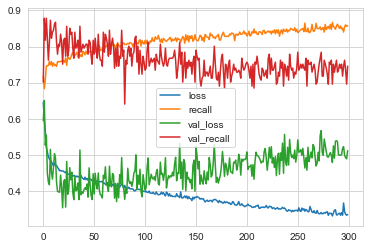

In [57]:
loss_df.plot();

In [58]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[628 168]
 [ 58 146]]
              precision    recall  f1-score   support

         0.0       0.92      0.79      0.85       796
         1.0       0.46      0.72      0.56       204

    accuracy                           0.77      1000
   macro avg       0.69      0.75      0.71      1000
weighted avg       0.82      0.77      0.79      1000



### ROC (Receiver Operating Curve) and AUC (Area Under Curve)

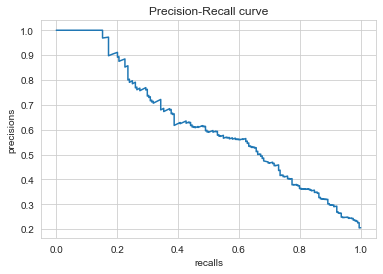

In [59]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [60]:
average_precision_score(y_test,y_pred_proba)

0.6200731374041373

### Adding Dropout Layer

In [61]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(16, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(8, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = Adam(lr=0.001), loss = "binary_crossentropy", metrics = ["Recall"])

In [62]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 300, verbose=1,class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 1s 7ms/step - loss: 0.6908 - recall: 0.6646 - val_loss: 0.6801 - val_recall: 0.6133
Epoch 2/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6758 - recall: 0.6429 - val_loss: 0.6698 - val_recall: 0.7017
Epoch 3/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6600 - recall: 0.6435 - val_loss: 0.6116 - val_recall: 0.5801
Epoch 4/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6515 - recall: 0.6368 - val_loss: 0.5945 - val_recall: 0.5856
Epoch 5/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6419 - recall: 0.6374 - val_loss: 0.6158 - val_recall: 0.7293
Epoch 6/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6331 - recall: 0.6283 - val_loss: 0.5740 - val_recall: 0.6575
Epoch 7/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6216 - recall: 0.6447 - val_loss: 0.6000 - val_recall: 0.7238
Epoch 8/300
64/64 [======================

64/64 [==============================] - 0s 3ms/step - loss: 0.4877 - recall: 0.7682 - val_loss: 0.4354 - val_recall: 0.8177
Epoch 61/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4882 - recall: 0.7688 - val_loss: 0.4126 - val_recall: 0.8287
Epoch 62/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4842 - recall: 0.7573 - val_loss: 0.4707 - val_recall: 0.8453
Epoch 63/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4831 - recall: 0.7676 - val_loss: 0.4200 - val_recall: 0.8343
Epoch 64/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4923 - recall: 0.7573 - val_loss: 0.4449 - val_recall: 0.8453
Epoch 65/300
64/64 [==============================] - 0s 4ms/step - loss: 0.4862 - recall: 0.7676 - val_loss: 0.4235 - val_recall: 0.8343
Epoch 66/300
64/64 [==============================] - 0s 4ms/step - loss: 0.4836 - recall: 0.7651 - val_loss: 0.4359 - val_recall: 0.8398
Epoch 67/300
64/64 [===========================

64/64 [==============================] - 0s 3ms/step - loss: 0.4750 - recall: 0.7663 - val_loss: 0.4418 - val_recall: 0.8453
Epoch 120/300
64/64 [==============================] - 0s 4ms/step - loss: 0.4711 - recall: 0.7766 - val_loss: 0.4136 - val_recall: 0.8177
Epoch 121/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4783 - recall: 0.7791 - val_loss: 0.4382 - val_recall: 0.8508
Epoch 122/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4728 - recall: 0.7857 - val_loss: 0.4387 - val_recall: 0.8508
Epoch 123/300
64/64 [==============================] - 0s 4ms/step - loss: 0.4744 - recall: 0.7827 - val_loss: 0.4217 - val_recall: 0.8398
Epoch 124/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4808 - recall: 0.7736 - val_loss: 0.4114 - val_recall: 0.8122
Epoch 125/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4661 - recall: 0.7736 - val_loss: 0.4182 - val_recall: 0.8177
Epoch 126/300
64/64 [====================

64/64 [==============================] - 0s 3ms/step - loss: 0.4630 - recall: 0.7887 - val_loss: 0.4248 - val_recall: 0.8232
Epoch 179/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4625 - recall: 0.7930 - val_loss: 0.4102 - val_recall: 0.8066
Epoch 180/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4663 - recall: 0.7803 - val_loss: 0.4190 - val_recall: 0.8232
Epoch 181/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4597 - recall: 0.7930 - val_loss: 0.4209 - val_recall: 0.8232
Epoch 182/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4641 - recall: 0.7863 - val_loss: 0.4041 - val_recall: 0.8066
Epoch 183/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4619 - recall: 0.7748 - val_loss: 0.4096 - val_recall: 0.8122
Epoch 184/300
64/64 [==============================] - 0s 4ms/step - loss: 0.4579 - recall: 0.7966 - val_loss: 0.4184 - val_recall: 0.8232
Epoch 185/300
64/64 [====================

64/64 [==============================] - 0s 4ms/step - loss: 0.4545 - recall: 0.7954 - val_loss: 0.3948 - val_recall: 0.7956
Epoch 238/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4614 - recall: 0.7791 - val_loss: 0.3976 - val_recall: 0.8177
Epoch 239/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4575 - recall: 0.7942 - val_loss: 0.4140 - val_recall: 0.8177
Epoch 240/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4671 - recall: 0.8027 - val_loss: 0.4165 - val_recall: 0.8287
Epoch 241/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4635 - recall: 0.7809 - val_loss: 0.4086 - val_recall: 0.8232
Epoch 242/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4610 - recall: 0.7869 - val_loss: 0.4219 - val_recall: 0.8287
Epoch 243/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4572 - recall: 0.7924 - val_loss: 0.4177 - val_recall: 0.8343
Epoch 244/300
64/64 [====================

64/64 [==============================] - 0s 3ms/step - loss: 0.4605 - recall: 0.7809 - val_loss: 0.4154 - val_recall: 0.8287
Epoch 297/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4596 - recall: 0.7972 - val_loss: 0.4066 - val_recall: 0.8287
Epoch 298/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4518 - recall: 0.7960 - val_loss: 0.4057 - val_recall: 0.8287
Epoch 299/300
64/64 [==============================] - 0s 4ms/step - loss: 0.4544 - recall: 0.7900 - val_loss: 0.4115 - val_recall: 0.8287
Epoch 300/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4569 - recall: 0.7918 - val_loss: 0.4066 - val_recall: 0.8232


In [63]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_14 (Dense)            (None, 8)                 136       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_15 (Dense)            (None, 1)                

#### Evaluate

In [64]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.69,0.66,0.68,0.61
1,0.68,0.64,0.67,0.70
2,0.66,0.64,0.61,0.58
3,0.65,0.64,0.59,0.59
4,0.64,0.64,0.62,0.73


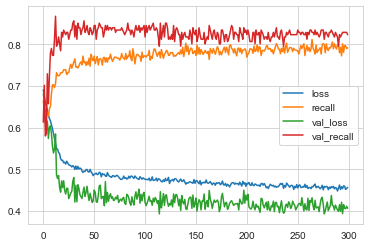

In [65]:
loss_df.plot();

In [66]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[631 165]
 [ 42 162]]
              precision    recall  f1-score   support

         0.0       0.94      0.79      0.86       796
         1.0       0.50      0.79      0.61       204

    accuracy                           0.79      1000
   macro avg       0.72      0.79      0.73      1000
weighted avg       0.85      0.79      0.81      1000



### ROC (Receiver Operating Curve) and AUC (Area Under Curve)

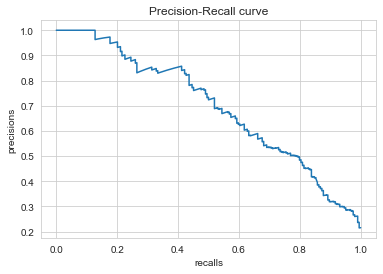

In [67]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [68]:
average_precision_score(y_test,y_pred_proba)

0.6962873016439126

### Adding Early Stopping

__Monitor val_loss__

In [69]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(16, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(8, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = Adam(lr=0.005), loss = "binary_crossentropy", metrics = ["Recall"])

In [70]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 25, restore_best_weights = True)

In [71]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, 
          batch_size = 128, epochs = 300, verbose=1, callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 1s 7ms/step - loss: 0.6692 - recall: 0.6223 - val_loss: 0.6168 - val_recall: 0.7017
Epoch 2/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6350 - recall: 0.6429 - val_loss: 0.6050 - val_recall: 0.7403
Epoch 3/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6019 - recall: 0.6695 - val_loss: 0.5404 - val_recall: 0.7624
Epoch 4/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5642 - recall: 0.7040 - val_loss: 0.5372 - val_recall: 0.8343
Epoch 5/300
64/64 [==============================] - 0s 4ms/step - loss: 0.5413 - recall: 0.7088 - val_loss: 0.4211 - val_recall: 0.7293
Epoch 6/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5324 - recall: 0.7016 - val_loss: 0.4486 - val_recall: 0.7901
Epoch 7/300
64/64 [==============================] - 0s 4ms/step - loss: 0.5201 - recall: 0.7506 - val_loss: 0.5027 - val_recall: 0.8674
Epoch 8/300
64/64 [======================

In [72]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 32)                384       
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_17 (Dense)            (None, 16)                528       
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_18 (Dense)            (None, 8)                 136       
                                                                 
 dropout_5 (Dropout)         (None, 8)                 0         
                                                                 
 dense_19 (Dense)            (None, 1)                

#### Evaluate

In [73]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.67,0.62,0.62,0.70
1,0.63,0.64,0.61,0.74
2,0.60,0.67,0.54,0.76
3,0.56,0.70,0.54,0.83
4,0.54,0.71,0.42,0.73


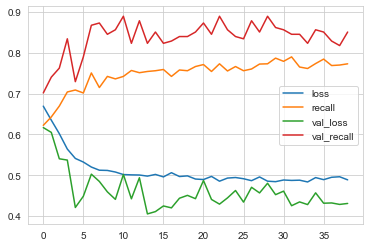

In [74]:
loss_df.plot();

In [75]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[624 172]
 [ 54 150]]
              precision    recall  f1-score   support

         0.0       0.92      0.78      0.85       796
         1.0       0.47      0.74      0.57       204

    accuracy                           0.77      1000
   macro avg       0.69      0.76      0.71      1000
weighted avg       0.83      0.77      0.79      1000



### ROC (Receiver Operating Curve) and AUC (Area Under Curve)

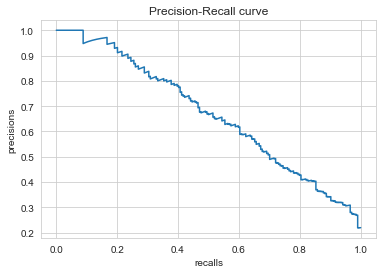

In [76]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [77]:
average_precision_score(y_test,y_pred_proba)

0.6699048928972458

__Monitor val_recall__

In [78]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(16, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(8, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = Adam(lr=0.005), loss = "binary_crossentropy", metrics = ["Recall"])

In [79]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 25, restore_best_weights = True)

In [80]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, 
          batch_size = 128, epochs = 300, verbose=1, callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 2s 9ms/step - loss: 0.6692 - recall: 0.6223 - val_loss: 0.6168 - val_recall: 0.7017
Epoch 2/300
64/64 [==============================] - 0s 4ms/step - loss: 0.6350 - recall: 0.6429 - val_loss: 0.6050 - val_recall: 0.7403
Epoch 3/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6019 - recall: 0.6695 - val_loss: 0.5404 - val_recall: 0.7624
Epoch 4/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5642 - recall: 0.7040 - val_loss: 0.5372 - val_recall: 0.8343
Epoch 5/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5413 - recall: 0.7088 - val_loss: 0.4211 - val_recall: 0.7293
Epoch 6/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5324 - recall: 0.7016 - val_loss: 0.4486 - val_recall: 0.7901
Epoch 7/300
64/64 [==============================] - 0s 4ms/step - loss: 0.5201 - recall: 0.7506 - val_loss: 0.5027 - val_recall: 0.8674
Epoch 8/300
64/64 [======================

In [81]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 32)                384       
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_21 (Dense)            (None, 16)                528       
                                                                 
 dropout_7 (Dropout)         (None, 16)                0         
                                                                 
 dense_22 (Dense)            (None, 8)                 136       
                                                                 
 dropout_8 (Dropout)         (None, 8)                 0         
                                                                 
 dense_23 (Dense)            (None, 1)                

#### Evaluate

In [82]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.67,0.62,0.62,0.70
1,0.63,0.64,0.61,0.74
2,0.60,0.67,0.54,0.76
3,0.56,0.70,0.54,0.83
4,0.54,0.71,0.42,0.73


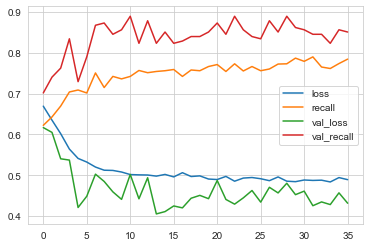

In [83]:
loss_df.plot();

In [84]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[528 268]
 [ 30 174]]
              precision    recall  f1-score   support

         0.0       0.95      0.66      0.78       796
         1.0       0.39      0.85      0.54       204

    accuracy                           0.70      1000
   macro avg       0.67      0.76      0.66      1000
weighted avg       0.83      0.70      0.73      1000



### ROC (Receiver Operating Curve) and AUC (Area Under Curve)

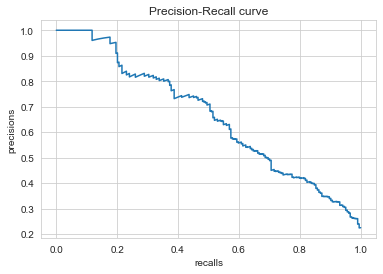

In [85]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [86]:
average_precision_score(y_test,y_pred_proba)

0.6608490514268202

## GridSearchCV

https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

In [87]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [88]:
def build_classifier(optimizer, learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units = 32, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 16, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 8, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['Recall'])
    return classifier

In [89]:
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [90]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 15, restore_best_weights = True)

In [91]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

parameters = {'batch_size': [128, 256],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'recall',
                          cv = 5,
                          n_jobs = -1,
                          verbose = 2)

grid_model.fit(X_train, y_train, callbacks = [early_stop],class_weight=class_weights)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Epoch 1/200
32/32 [==============================] - 1s 11ms/step - loss: 0.6690 - recall: 0.5660 - val_loss: 0.6048 - val_recall: 0.5746
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6336 - recall: 0.6271 - val_loss: 0.5867 - val_recall: 0.7238
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6200 - recall: 0.6362 - val_loss: 0.5568 - val_recall: 0.6961
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6093 - recall: 0.6453 - val_loss: 0.5375 - val_recall: 0.6519
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.5982 - recall: 0.6792 - val_loss: 0.5014 - val_recall: 0.6243
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 0.5902 - recall: 0.6731 - val_loss: 0.5324 - val_recall: 0.7459
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 0.5713 - recall: 0.7064 - val_loss: 0.4691

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x00000216D956F6D0>,
             n_jobs=-1,
             param_grid={'batch_size': [128, 256],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizer_v2.nadam.Nadam'>]},
             scoring='recall', verbose=2)

In [92]:
grid_model.best_score_

0.8477117487916134

In [93]:
grid_model.best_params_

{'batch_size': 256,
 'learn_rate': 0.005,
 'optimizer': keras.optimizer_v2.rmsprop.RMSprop}

#### Evaluate

In [94]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[516 280]
 [ 36 168]]
              precision    recall  f1-score   support

         0.0       0.93      0.65      0.77       796
         1.0       0.38      0.82      0.52       204

    accuracy                           0.68      1000
   macro avg       0.65      0.74      0.64      1000
weighted avg       0.82      0.68      0.71      1000



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

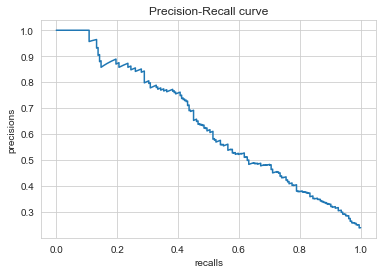

In [95]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [96]:
average_precision_score(y_test,y_pred_proba)

0.6347351348328157

## Final Model and Model Deployment

In [97]:
import pickle
pickle.dump(scaler, open("scaler_cancer", 'wb'))

In [98]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(16, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(8, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = Nadam(lr=0.005), loss = "binary_crossentropy", metrics = ["Recall"])

In [99]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 15, restore_best_weights = True)

In [100]:
model.fit(x = X_train, y = y_train, 
          validation_data = (X_test, y_test), 
          batch_size = 256, epochs = 200, verbose=1, callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/200
36/36 [==============================] - 2s 12ms/step - loss: 0.6803 - recall: 0.6748 - val_loss: 0.6534 - val_recall: 0.5539
Epoch 2/200
36/36 [==============================] - 0s 4ms/step - loss: 0.6415 - recall: 0.6148 - val_loss: 0.6803 - val_recall: 0.7451
Epoch 3/200
36/36 [==============================] - 0s 3ms/step - loss: 0.6085 - recall: 0.6738 - val_loss: 0.5559 - val_recall: 0.6422
Epoch 4/200
36/36 [==============================] - 0s 3ms/step - loss: 0.5813 - recall: 0.6841 - val_loss: 0.5873 - val_recall: 0.7745
Epoch 5/200
36/36 [==============================] - 0s 4ms/step - loss: 0.5502 - recall: 0.7158 - val_loss: 0.5138 - val_recall: 0.7206
Epoch 6/200
36/36 [==============================] - 0s 4ms/step - loss: 0.5363 - recall: 0.7212 - val_loss: 0.4677 - val_recall: 0.6667
Epoch 7/200
36/36 [==============================] - 0s 4ms/step - loss: 0.5237 - recall: 0.7267 - val_loss: 0.4792 - val_recall: 0.7108
Epoch 8/200
36/36 [=====================

In [101]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[526 270]
 [ 34 170]]
              precision    recall  f1-score   support

         0.0       0.94      0.66      0.78       796
         1.0       0.39      0.83      0.53       204

    accuracy                           0.70      1000
   macro avg       0.66      0.75      0.65      1000
weighted avg       0.83      0.70      0.73      1000



In [102]:
model.save('churn_model1')

INFO:tensorflow:Assets written to: churn_model1\assets


### Prediction

In [103]:
single_customer=df.drop('Exited',axis=1).iloc[3]
single_customer

CreditScore            699.00
Age                     39.00
Tenure                   1.00
Balance                  0.00
NumOfProducts            2.00
HasCrCard                0.00
IsActiveMember           0.00
EstimatedSalary     93,826.63
Geography_Germany        0.00
Geography_Spain          0.00
Gender_Male              0.00
Name: 4, dtype: float64

In [104]:
single_customer = scaler.transform(single_customer.values.reshape(-1,11))
single_customer

array([[0.698     , 0.28378378, 0.1       , 0.        , 0.33333333,
        0.        , 0.        , 0.46912005, 0.        , 0.        ,
        0.        ]])

In [105]:
model.predict(single_customer)

array([[0.27275646]], dtype=float32)

In [106]:
df['Exited'].iloc[3]

0.0

## Comparison with ML

### Logistic Regression

In [126]:
from sklearn.linear_model import LogisticRegression

In [156]:
log_model=LogisticRegression(C= 0.5, class_weight= class_weights,penalty= 'l1',solver= 'liblinear', random_state=42,max_iter=10000)
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

<IPython.core.display.Javascript object>

[[558 238]
 [ 65 139]]
              precision    recall  f1-score   support

         0.0       0.90      0.70      0.79       796
         1.0       0.37      0.68      0.48       204

    accuracy                           0.70      1000
   macro avg       0.63      0.69      0.63      1000
weighted avg       0.79      0.70      0.72      1000



### Random Forest

In [128]:
from sklearn.ensemble import RandomForestClassifier

In [157]:
X1 = df0.drop(["CustomerId", "Surname","Exited"], axis=1)
y1 = df0['Exited']

In [158]:
cat = X1.select_dtypes("object").columns
cat

Index(['Geography', 'Gender'], dtype='object')

In [159]:
X1[cat]

,Geography,Gender
RowNumber,,
1,France,Female
2,Spain,Female
3,France,Female
4,France,Female
5,Spain,Female
...,...,...
9996,France,Male
9997,France,Male
9998,France,Female


In [160]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
enc.fit_transform(X1[cat])

array([[0., 0.],
       [2., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [1., 1.],
       [0., 0.]])

In [161]:
X1[cat] = enc.fit_transform(X1[cat])
X1[cat]

,Geography,Gender
RowNumber,,
1,0.00,0.00
2,2.00,0.00
3,0.00,0.00
4,0.00,0.00
5,2.00,0.00
...,...,...
9996,0.00,1.00
9997,0.00,1.00
9998,0.00,0.00


In [168]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, stratify = y1, test_size=0.20, random_state=42)

In [169]:
rf_model = RandomForestClassifier(random_state=42, class_weight= class_weights)
rf_model.fit(X_train1, y_train1)
y_pred1 = rf_model.predict(X_test1)
print(confusion_matrix(y_test1, y_pred1))
print(classification_report(y_test1,y_pred1))

<IPython.core.display.Javascript object>

[[1541   52]
 [ 231  176]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.77      0.43      0.55       407

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000



___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___